In [2]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

idf for cat dot mammals mouse and pet  =  [4.321928094887363, 2.321928094887362, 5.643856189774724, 3.321928094887362, 0.7369655941662062]
Tf for doc1 = [0.2, 0.0, 0.0, 0.2, 0.6]
Tf for doc2 = [0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0]
Tf for doc3 = [0.6666666666666666, 0.0, 0.0, 0.3333333333333333, 0.0]
Tf for query = [0.25, 0.0, 0.25, 0.25, 0.25]
Tf-idf for doc1 = [0.8643856189774726, 0.0, 0.0, 0.6643856189774725, 0.44217935649972373]
Tf-idf for doc2 = [1.4406426982957874, 0.0, 1.8812853965915748, 1.107309364962454, 0.0]
Tf-idf for doc3 = [2.881285396591575, 0.0, 0.0, 1.107309364962454, 0.0]
Tf-idf for query = [1.0804820237218407, 0.0, 1.410964047443681, 0.8304820237218405, 0.18424139854155155]
Cosine similarity between query and document 1 = 0.6761047683328936
Cosine similarity between query and document 2 = 0.9956182061125568
Cosine similarity between query and document 3 = 0.66310492687862
The relative ranking of the documents are D2 > D1 > D3


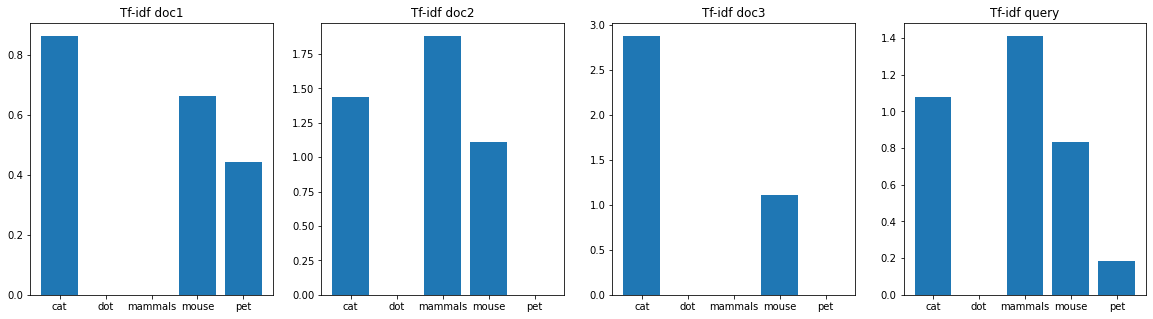

In [34]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import matplotlib.pyplot as plt

### a) ###
l=['cat','dot','mammals','mouse','pet']
df = [5,20,2,10,60]
idf = []
for i in range(len(df)):
    idf.append(np.log2(1/(0.01*df[i])))
print("idf for",'cat','dot','mammals','mouse','and pet'," = ",idf)
    
### b) ###
d1 = ['cat','pet','pet','mouse','pet']
d2 = ['cat','mouse','mammals']
d3 = ['cat','cat','mouse']
q = ['mouse','cat','pet','mammals']

mer = [D1,D2,D3,query]
file = ['doc1','doc2','doc3','query']
tf = []
for i in range (0,len(mer)):
    tf_D = []
    for j in range (0,len(l)):
        tf_D.append(mer[i].count(l[j]) / float(len(mer[i])))
    tf.append(tf_D)
    print("Tf for",file[i],'=',tf_D)
### c) ###
fig,ax = plt.subplots(1,4,figsize=(20,5))

tf_idf = []
for i in range (0,len(mer)):
    tf_idf_D = []
    for k in range (0,len(l)):
        tf_idf_D.append(tf[i][k]*idf[k])
    tf_idf.append(tf_idf_D)
    print("Tf-idf for",file[i],'=',tf_idf_D)
    ax[i].set_title("Tf-idf "+file[i])
    ax[i].bar(l,tf_idf_D)
### d) ###
def cosine_similarity(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
for i in range(3):
    score = cosine_similarity(tf_idf[i],tf_idf[3])
    print("Cosine similarity between query and document",i+1,"=",score)
    
### e) ###
print("The relative ranking of the documents are D2 > D1 > D3")
##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)

Type your answer here:

precision = $\frac{relevant}{returned} = \frac{300}{300 + 50} = 0.857$


recall = $\frac{#relevant}/{#totalـrelevant} = \frac{300}{500} = 0.600$

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.

Type your answers here: 

## Part 1:
### A -

#### Q1: 
The parts of the building in the image which are darker, are less detected in contrast to the brighter sides, and the edge between these two parts is detected mostly.


#### Q2: 
When we have detected so many dominant gradient orientations in one window , it is detected multiple times with distinct orientation.(when dominant orientations are more than 80% in gradient histogram). This structure can be seen in running detection on any image that has multiple different directions.


### B -

#### Q1: 
The descriptor must be very robust and distinctive to light, orientation, scale and other features.Because to be sure about the keypoints descriptor needs as much information as it can have to be distinctive.


#### Q2: 
There are 2 problems, first is symmetric parts in one image and the second is light change. We can see that there are repetitive parts in the image because of the design so many of the features are the same.As a result there can be false matching when there are similar features in different parts. Also because of light change can be misleading . Also Nearest Neighbor Distance is sensitive to pixel intensity variations. We can find the NN Distance Ratio between the best and second best nearest neighbor matches, using threshold can be useful to remove false matches and select only the best (sure) matches.


### C -

#### Q1: 
Light difference can make some features look similar that are actually not, noise , not being distictive , or inherent similarity can cause the mismathces. To reduce mismatches we can use RANSAC  and find the proper geometric transofrmation.Using that, we can reject outliers that doesn't confirm the transformation, and this should remove most of the mismatches.


## Part 2:

#### Q1: 
First, we employ the Harris corner detector to capture features, benefiting from its ability to handle affine variations. Then, we use three matching points to calculate an affine transformation. Afterward, we check the SIFT feature matches using this transformation. If the results are not satisfactory, we revisit the step of estimating the affine transformation for improvement.

## Part 3:

### A -

#### Q1: 
Significantly reducing the vocabulary size results in only a slight decrease in the number of inliers, maintaining the transformation computation's level of complexity.

#### Q2: 
This is achievable because we can pre-compute the conversion of descriptors into visual words.

#### Q3: 
Approximate speed enhancements can be derived as follows:

For 10 images: 0.16 seconds

For 100 images: 1.7 seconds

For 1000 images: 16 seconds

It's evident that the speedup is nearly directly proportional to the number of images used.

### B - 
#### Q1:
Since the top image is the same as the query image.


### C -
#### Q1:
Since the score, here, represents the number of inlier words.

#### Q2:
The images that are not relevant have lower scores. Therefore, the retrieval results have improved after applying geometric verification.
